# Description
Create database with MySQL.

Level 1

- Exercise 1

Create a simple relational database using MySQL(https://www.mysql.com/) and connect it to Python.

Level 2

- Exercise 2
Show that you can load some simple queries to a Pandas Dataframe.

Level 3

- Exercise 3
Generate a graph summarizing the data.

# Level 1

## - Exercise 1

Create a simple relational database using MySQL(https://www.mysql.com/) and connect it to Python.


We are going to use our database created in the previous task: S13_T01 and we are going to connect it to Python.

In [1]:
# Import Libraries
import pandas as pd
import mysql.connector
import os
os.sys.path.append(os.path.dirname(os.path.abspath('.')))
import Data.config as cfg

import matplotlib as plt
import seaborn as sns

import Data.Pers_lib as Pers

In [2]:
# Connect to database
mydb = mysql.connector.connect(**cfg.config)
print(mydb)

We have connected to our MySQL database without exposing our credentials when our notebook uploads to Github.


# Level 2

## - Exercise 2
Show that you can load some simple queries to a Pandas Dataframe.

Let's show first the databases existing in our host:

In [3]:
cursor = mydb.cursor()
cursor.execute("SHOW DATABASES")

for dbs in cursor:
  print(dbs)

('classicmodels',)
('information_schema',)
('mysql',)
('performance_schema',)
('s13_t01',)
('sys',)


Let's now show the tables in our s13_t01 database:

In [4]:
cursor.execute("SHOW TABLES")

for tables in cursor:
  print(tables)

('customerstable',)
('employeestable',)
('establismenttable',)
('productstable',)
('providertable',)
('shoppingtable',)
('typeofproducts',)


Finally, lets select all registers from table "costumerstable" and then convert them to list and finally to pd.dataframe

In [5]:
# First, let's take the attributes from sql table to columns in dataframe.
cursor.execute("show COLUMNS from customerstable;")
result = cursor.fetchall()

columns = []
for row in result:
  columns.append(row[0])
columns

['id', 'Name', 'Surnames', 'NIF', 'Address']

In [6]:
cursor.execute("SELECT * FROM customerstable")

result = cursor.fetchall()

costumerslist = []
for row in result:
  costumerslist.append(row)

costumersdf = pd.DataFrame(costumerslist,columns=columns)
costumersdf

,id,Name,Surnames,NIF,Address
0,1,Pepe,Martinez,43212345H,"c/Santa María, 5, Madrid"
1,2,Juan,Lopez,45323245H,Albacente
2,3,Jose,Garcia,55251111H,Sevilla
3,4,Jesús,Fernandez,46526111J,Barcelona


# PENDING:      

* Put more data in SQL table in order to do some graphic in Ex.3


# Level 3

## - Exercise 3
Generate a graph summarizing the data.

Now we have imported an example sql database from https://www.mysqltutorial.org/mysql-sample-database.aspx  
With this database we are going to generate some graphs.

### Graph Stock x Product Lines

In [7]:
cursor.execute("USE classicmodels")


In [8]:
cursor = mydb.cursor()
cursor.execute("SHOW TABLES")

for dbs in cursor:
  print(dbs)

('customers',)
('employees',)
('offices',)
('orderdetails',)
('orders',)
('payments',)
('productlines',)
('products',)


In this case, let's take all the table from SQL to dataframe (as exercise 2), and then plot it.

In [9]:
# First, let's take the attributes from sql table to columns in dataframe.
cursor.execute("show COLUMNS from products;")
result = cursor.fetchall()

columns = []
for row in result:
  columns.append(row[0])
columns

cursor.execute("SELECT * FROM products")

result = cursor.fetchall()

costumerslist = []
for row in result:
  costumerslist.append(row)

Products_df = pd.DataFrame(costumerslist,columns=columns)
Products_df

,productCode,productName,productLine,productScale,productVendor,productDescription,quantityInStock,buyPrice,MSRP
0,S10_1678,1969 Harley Davidson Ultimate Chopper,Motorcycles,1:10,Min Lin Diecast,"This replica features working kickstand, front...",7933,48.81,95.70
1,S10_1949,1952 Alpine Renault 1300,Classic Cars,1:10,Classic Metal Creations,Turnable front wheels; steering function; deta...,7305,98.58,214.30
2,S10_2016,1996 Moto Guzzi 1100i,Motorcycles,1:10,Highway 66 Mini Classics,"Official Moto Guzzi logos and insignias, saddl...",6625,68.99,118.94
3,S10_4698,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,1:10,Red Start Diecast,"Model features, official Harley Davidson logos...",5582,91.02,193.66
4,S10_4757,1972 Alfa Romeo GTA,Classic Cars,1:10,Motor City Art Classics,Features include: Turnable front wheels; steer...,3252,85.68,136.00
...,...,...,...,...,...,...,...,...,...
105,S700_3505,The Titanic,Ships,1:700,Carousel DieCast Legends,"Completed model measures 19 1/2 inches long, 9...",1956,51.09,100.17
106,S700_3962,The Queen Mary,Ships,1:700,Welly Diecast Productions,Exact replica. Wood and Metal. Many extras inc...,5088,53.63,99.31
107,S700_4002,American Airlines: MD-11S,Planes,1:700,Second Gear Diecast,Polished finish. Exact replia with official lo...,8820,36.27,74.03
108,S72_1253,Boeing X-32A JSF,Planes,1:72,Motor City Art Classics,"10"" Wingspan with retractable landing gears.Co...",4857,32.77,49.66


Just 0,8s to fetch all data. In this case is ok to take all the table, convert it to Pandas df, and then plot it.  
With bigger databases maybe this strategy should change and just make the "selects" needed in order to plot the graphic.

In [10]:
Products_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   productCode         110 non-null    object
 1   productName         110 non-null    object
 2   productLine         110 non-null    object
 3   productScale        110 non-null    object
 4   productVendor       110 non-null    object
 5   productDescription  110 non-null    object
 6   quantityInStock     110 non-null    int64 
 7   buyPrice            110 non-null    object
 8   MSRP                110 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.9+ KB


Let's plot the stock we have in each productLine.

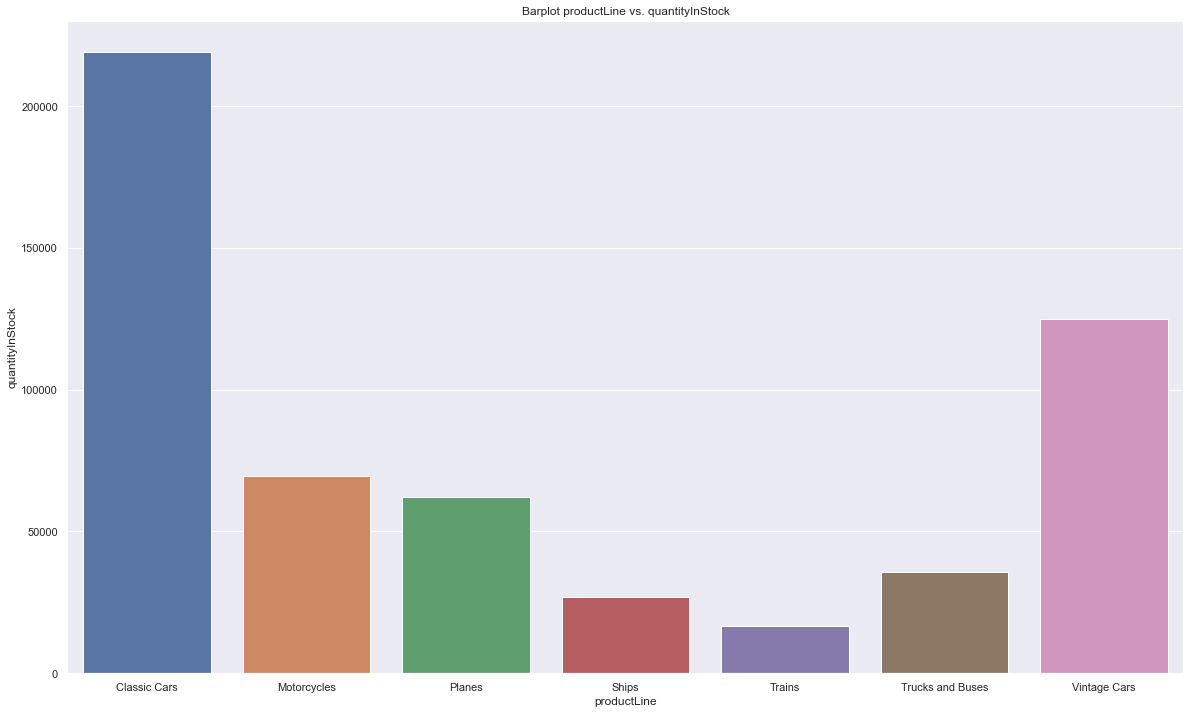

In [11]:
Stock_df = pd.DataFrame(Products_df.groupby(['productLine']).sum())
Stock_df = Stock_df.reset_index()
Stock_df
# plot a bar chart
Pers.barplot2D('productLine','quantityInStock',Stock_df);


Let's plot our Products Scale (cars, ships, etc.) vs. buyPrice.

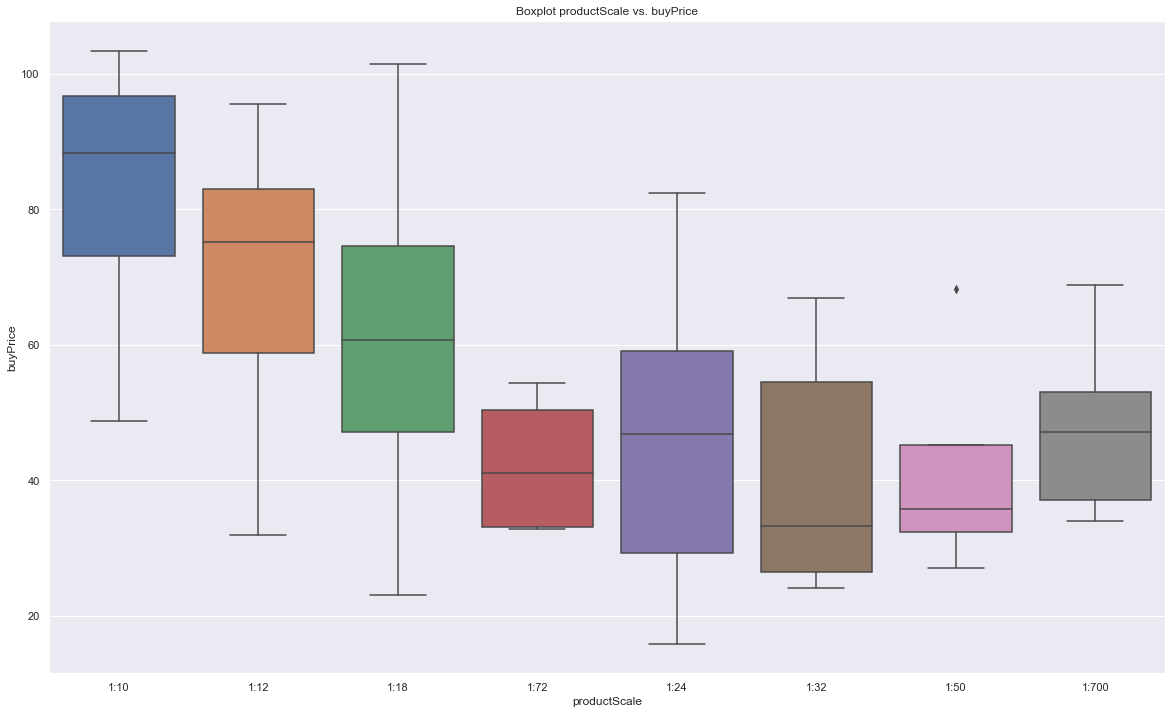

In [12]:
Products_df.buyPrice = pd.to_numeric(Products_df.buyPrice)

Pers.boxplot2D('productScale','buyPrice',Products_df)